# 10 Semantic segmentors

<a href="https://colab.research.google.com/drive/1WJtghM5munkksP2CZQ90fiVTYkSL3e3S?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

In this notebook, 10 well known pre-trained segmentors are loaded and used in a standard and easy way.

1. FCN: Fully Convolutional Networks for Semantic Segmentation (2017)
2. U-net: Convolutional networks for biomedical image segmentation (2015)
3. PSPNet: Pyramid Scene Parsing Network (2017)
4. DeepLabV3: Rethinking atrous convolution for semantic image segmentation (2017)
5. UPerNet: Unified Perceptual Parsing for Scene Understanding (2018)
6. CCNet: Criss-Cross Attention for Semantic Segmentation (2019)
7. FastFCN: Rethinking Dilated Convolution in the Backbone for Semantic Segmentation (2019)
8. SETR: Rethinking Semantic Segmentation from a Sequence-to-Sequence Perspective with Transformers (2020)
9. Segmenter: Transformer for Semantic Segmentation (2021)
10. SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers (2021)

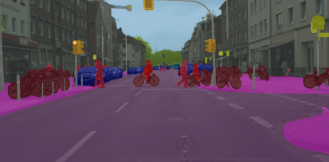

## Setup

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
import torch 
torch.__version__

'1.10.0+cu111'

In [3]:
!pip install openmim
!mim install mmsegmentation

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=c158f1c9e2854eb747a08e820e303b1f8972fb5506a1f5b8749bac9f4b438fab
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmsegmentation from https://github.com/open-mmlab/mmsegmentation.git.
Cloning into '/tmp/tmpnabzf1b0/mmsegmentation'...
remote: Enumerating objects: 6504, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6504 (delta 8), reused 14 (delta 5), pack-reused 6480
Receiving objects: 100% (6504/6504), 12.62 MiB | 42.92 MiB/s, done.
Resolving deltas: 100% (4843/4843), done.
Note: checking out 'e518d25e731be97aa1da704df83542f2951bdd21'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing ano

In [4]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 6504, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6504 (delta 8), reused 14 (delta 5), pack-reused 6480
Receiving objects: 100% (6504/6504), 13.06 MiB | 42.86 MiB/s, done.
Resolving deltas: 100% (4821/4821), done.
/content/mmsegmentation


## Download checkpoints

In [28]:
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/fcn/fcn_r50-d8_512x1024_40k_cityscapes/fcn_r50-d8_512x1024_40k_cityscapes_20200604_192608-efe53f0d.pth \
      -O checkpoints/fcn_r50-d8_512x1024_40k_cityscapes_20200604_192608-efe53f0d.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/unet/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth \
      -O checkpoints/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth


!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth \
      -O checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth \
      -O checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/upernet/upernet_r50_512x1024_40k_cityscapes/upernet_r50_512x1024_40k_cityscapes_20200605_094827-aa54cb54.pth \
      -O checkpoints/upernet_r50_512x1024_40k_cityscapes_20200605_094827-aa54cb54.pth


!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/ccnet/ccnet_r50-d8_512x1024_40k_cityscapes/ccnet_r50-d8_512x1024_40k_cityscapes_20200616_142517-4123f401.pth \
      -O checkpoints/ccnet_r50-d8_512x1024_40k_cityscapes_20200616_142517-4123f401.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/fastfcn/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth \
      -O checkpoints/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/setr/setr_naive_512x512_160k_b16_ade20k/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth \
      -O checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth \
      -O checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth

!wget -c https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth \
      -O checkpoints/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth


mkdir: cannot create directory ‘checkpoints’: File exists
--2022-03-19 17:27:09--  https://download.openmmlab.com/mmsegmentation/v0.5/fcn/fcn_r50-d8_512x1024_40k_cityscapes/fcn_r50-d8_512x1024_40k_cityscapes_20200604_192608-efe53f0d.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2022-03-19 17:27:10--  https://download.openmmlab.com/mmsegmentation/v0.5/unet/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2022-03

## Inference

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
from google.colab.patches import cv2_imshow

In [30]:
# Select a test image
img = 'demo/demo.png'

In [34]:
# model and config lists 
config_list = ['configs/fcn/fcn_r50-d8_512x1024_40k_cityscapes.py',
               'configs/unet/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes.py',
               'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py',
               'configs/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes.py',
               'configs/upernet/upernet_r50_512x1024_40k_cityscapes.py',
               'configs/ccnet/ccnet_r50-d8_512x1024_40k_cityscapes.py',
               'configs/fastfcn/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes.py',
               'configs/setr/setr_naive_512x512_160k_b16_ade20k.py',
               'configs/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k.py',
               'configs/segformer/segformer_mit-b0_512x512_160k_ade20k.py']


checkpoint_list = ['checkpoints/fcn_r50-d8_512x1024_40k_cityscapes_20200604_192608-efe53f0d.pth',
                   'checkpoints/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth',
                   'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth',
                   'checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth',
                   'checkpoints/upernet_r50_512x1024_40k_cityscapes_20200605_094827-aa54cb54.pth',
                   'checkpoints/ccnet_r50-d8_512x1024_40k_cityscapes_20200616_142517-4123f401.pth',
                   'checkpoints/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth',
                   'checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth',
                   'checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth',
                   'checkpoints/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth']

segmentors_names = ['FCN: Fully Convolutional Networks for Semantic Segmentation (2017)',
                   'U-net: Convolutional networks for biomedical image segmentation(2015)',
                   'PSPNet: Pyramid Scene Parsing Network (2017)',
                   'DeepLabV3: Rethinking atrous convolution for semantic image segmentation (2017)',
                   'UPerNet: Unified Perceptual Parsing for Scene Understanding (2018)',
                   'CCNet: Criss-Cross Attention for Semantic Segmentation (2019)',
                   'FastFCN: Rethinking Dilated Convolution in the Backbone for Semantic Segmentation (2019)',
                   'SETR: Rethinking Semantic Segmentation from a Sequence-to-Sequence Perspective with Transformers (2020)',
                   'Segmenter: Transformer for Semantic Segmentation (2021)',
                   'SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers (2021)']


load checkpoint from local path: checkpoints/fcn_r50-d8_512x1024_40k_cityscapes_20200604_192608-efe53f0d.pth
FCN: Fully Convolutional Networks for Semantic Segmentation (2017)


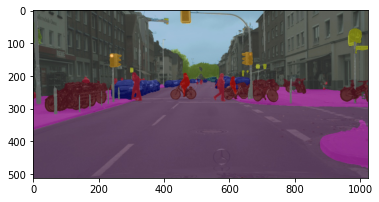

load checkpoint from local path: checkpoints/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth
U-net: Convolutional networks for biomedical image segmentation(2015)


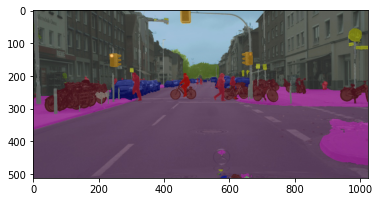

load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
PSPNet: Pyramid Scene Parsing Network (2017)


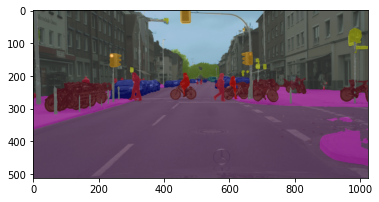

load checkpoint from local path: checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
DeepLabV3: Rethinking atrous convolution for semantic image segmentation (2017)


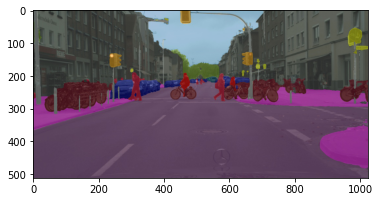

load checkpoint from local path: checkpoints/upernet_r50_512x1024_40k_cityscapes_20200605_094827-aa54cb54.pth
UPerNet: Unified Perceptual Parsing for Scene Understanding (2018)


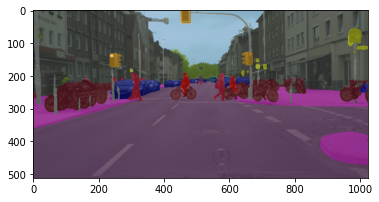

load checkpoint from local path: checkpoints/ccnet_r50-d8_512x1024_40k_cityscapes_20200616_142517-4123f401.pth
CCNet: Criss-Cross Attention for Semantic Segmentation (2019)


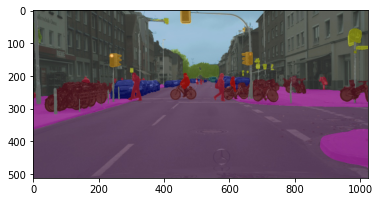

load checkpoint from local path: checkpoints/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth
FastFCN: Rethinking Dilated Convolution in the Backbone for Semantic Segmentation (2019)


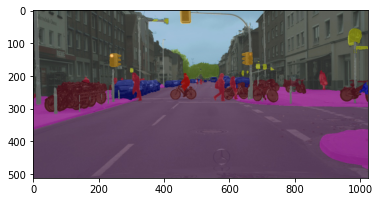

load checkpoint from local path: checkpoints/setr_naive_512x512_160k_b16_ade20k_20210619_191258-061f24f5.pth
SETR: Rethinking Semantic Segmentation from a Sequence-to-Sequence Perspective with Transformers (2020)


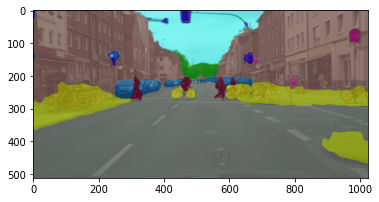

load checkpoint from local path: checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
Segmenter: Transformer for Semantic Segmentation (2021)


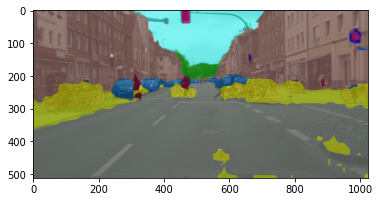

load checkpoint from local path: checkpoints/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth
SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers (2021)


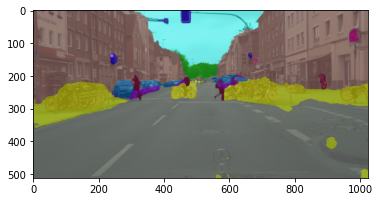

In [35]:
for m_name, config, checkpoint in zip(segmentors_names, config_list, checkpoint_list, ):
  model = init_segmentor(config, checkpoint, device='cuda:0')
  result = inference_segmentor(model, img)
  model.show_result(img, result, out_file='result.jpg', win_name=m_name)

  img_read = mpimg.imread('result.jpg')
  print(m_name)
  plt.imshow(img_read)
  plt.show()